1. Open a new notebook. Import the data from Al7075_out.xlsx and plot the stress vs strain curve. Make sure you label your axes. Plot your points as blue triangles.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
raw=pd.read_excel('Al7075_out.xlsx')
raw.head()

,stress MPa,strain,"force, lbs","length, in"
0,0.0,0.00000,0.000000,2.00000
1,112.0,0.00165,3189.705354,2.00330
2,222.0,0.00322,6322.451684,2.00644
3,326.0,0.00474,9284.320941,2.00948
4,415.0,0.00605,11818.997517,2.01210


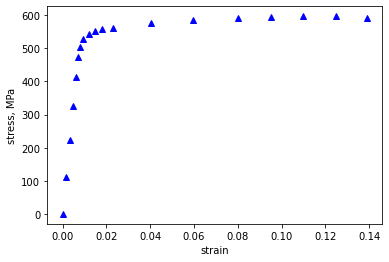

In [3]:
plt.plot(raw['strain'],raw['stress MPa'],'^b')
plt.xlabel('strain')
plt.ylabel('stress, MPa')
plt.show()

## Lesson 1 Homework Problem 2

**2.** Write a function that uses the metric tensor to find the angle $\theta$ in degrees between 3 atoms as shown for example below.  Your function should allow you to enter the fractional coordinates of the three atoms, [x1,y1,z1], [x2,y2,z2], and [x3,y3,z3], and the lattice parameters, a,b,c,alpha,beta,gamma.  You can use the numbers below to test your code.  The Oxygen - $Si_1$ bond length will be 1.60674 $\mathring{A}$ and the Oxygen - $Si_2$ bond length will be 1.61035 $\mathring{A}$.  

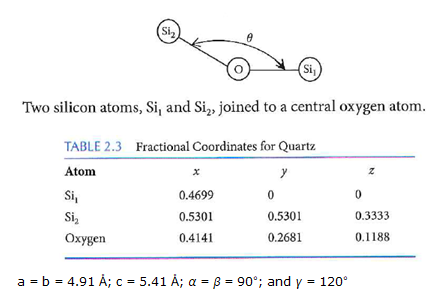



In [4]:
import numpy as np

In [5]:
# atom1, atom2 and atom3 are taken as lists [x,y,z]
# atom2 is the vertex of the angle
def angle(atom1, atom2, atom3,a,b,c,alpha, beta, gamma):
    alpha=np.deg2rad(alpha)
    beta=np.deg2rad(beta)
    gamma=np.deg2rad(gamma)
    g=np.array([
    [a*a, a*b*np.cos(gamma), a*c*np.cos(beta)],
    [b*a*np.cos(gamma), b*b, b*c*np.cos(alpha)], 
    [c*a*np.cos(beta),c*b*np.cos(alpha),c*c]
    ])
    atom1=np.array(atom1)
    atom2=np.array(atom2)
    atom3=np.array(atom3)
    v1=atom1-atom2
    v2=atom3-atom2
    v1mag=np.sqrt(np.dot(v1,np.dot(g,v1)))
    v2mag=np.sqrt(np.dot(v2,np.dot(g,v2)))
    temp=np.dot(v1,np.dot(g,v2))
    cos_ang=(temp)/v1mag/v2mag
    ang_degrees=np.rad2deg(np.arccos(cos_ang))
    return(ang_degrees)
   

In [6]:
v1=np.array([1,2,3])
v2=np.array([[1],[2],[3]])
v3=np.array([5,6,7])
np.dot(v1,v2)

array([14])

In [7]:
angle([0.4699,0,0],[0.4141,0.2681,0.1188],[0.5301, 0.5301,0.3333], 4.91, 4.91, 5.41, 90,90,120)

143.6725337710947

It works.  So I just need to copy the following code in notepad++ and save as a *.py file.  


```python

import numpy as np

def angle(atom1, atom2, atom3,a,b,c,alpha, beta, gamma):
    alpha=np.deg2rad(alpha)
    beta=np.deg2rad(beta)
    gamma=np.deg2rad(gamma)
    g=np.array([
    [a*a, a*b*np.cos(gamma), a*c*np.cos(beta)],
    [b*a*np.cos(gamma), b*b, b*c*np.cos(alpha)], 
    [c*a*np.cos(beta),c*b*np.cos(alpha),c*c]
    ])
    atom1=np.array(atom1)
    atom2=np.array(atom2)
    atom3=np.array(atom3)
    v1=atom1-atom2
    v2=atom3-atom2
    v1mag=np.sqrt(np.dot(v1,np.dot(g,v1)))
    v2mag=np.sqrt(np.dot(v2,np.dot(g,v2)))
    temp=np.dot(v1,np.dot(g,v2))
    cos_ang=(temp)/v1mag/v2mag
    ang_degrees=np.rad2deg(np.arccos(cos_ang))
    return(ang_degrees)
